Este colab fue desarrollado por Arnold Charry Armero

# Bloomington

Durante cada período de 6 horas del día, el Bloomington
El Departamento de Policía necesita al menos el número de policías
como se muestra en la Tabla 5. Se puede contratar policías para trabajar 12
horas consecutivas o 18 horas consecutivas. los policías se
pagan $\$4$ por hora por cada una de las primeras 12 horas al día que
trabajan y se les paga $\$6$ por hora por cada una de las próximas 6 horas
que trabajan en un día. Formule un LP que pueda usarse para
Minimizar el costo de reunirse con la policía diaria de Bloomington.
requisitos.

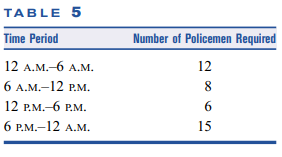

## Conjuntos


$ i = \text{Empleados que comienzan en la franja (hora) } i$

$ j = \text{Empleados que comienzan en la franja (hora) } j$

## Parámetros

$ D_{j} = \textrm{Números de trabajadores } j \textrm{ necesarios}$

$ P_{ij} = \textrm{1 si el trabajador } i \textrm{ se encuentra disponible en el horario } j \textrm{, 0 lo contrario.}$

$ M_{ij} = \textrm{1 si el trabajador} i \textrm{ se encuentra disponible en el horario } j \textrm{, 0 lo contrario.}$

$ CN = \textrm{Costo de un trabajador normal } $

$ CE = \textrm{Costo de un trabajador extra } $


## Variables de decisión

$ x_{i} = \textrm{Trabajadores que comienzan su empleo en jornada regular en la franja } i $

$ y_{i} = \textrm{Trabajadores que comienzan su empleo en jornada extra en la franja } i $

## Función objetivo

$$ \textrm{Min } z = \sum_{i = 1}^{n}CN\: x_{i} + \sum_{i = 1}^{n} CE\: y_{i} $$



## Restricciones

Se debe satisfacer la demanda $j$,

$$ \sum_{i = 1}^{n}x_{i} P_{ij} + y_{i} M_{ij} \geq D_{j}, \forall j$$

In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 18.0 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [3]:
#Conjuntos
hora = range(4)
horas = range(4)

In [8]:
# Parámetros
D = [12, 8, 6, 15]

CN = 48
CE = 84

# Número de días en la semana
num_dias = 4

def crear_matriz_turnos(num_dias, turnos):
    # Crear una matriz de ceros
    matriz_turnos = [[0 for _ in range(num_dias)] for _ in range(num_dias)]

    # Asignar turnos de trabajo (5 días trabajados, 2 días de descanso)
    for i in range(num_dias):
        # Determinar el inicio del ciclo de trabajo del empleado
        inicio = i % num_dias
        for dia in range(num_dias):
            if (dia >= inicio and dia < inicio + turnos) or (inicio + turnos > num_dias and dia < (inicio + turnos) % num_dias):
                matriz_turnos[i][dia] = 1

    return matriz_turnos



# Llamar a la función para crear la matriz de turnos
P = crear_matriz_turnos(num_dias, 2)
M = crear_matriz_turnos(num_dias, 3)

# Mostrar la matriz
print("---Matriz de Turnos P---")
for i in range(num_dias):
    for j in range(num_dias):
        print(P[i][j], end="  " if P[i][j] >= 0 and P[i][j] < 10 else " ")
    print("")



print("---Matriz de Turnos M---")
for i in range(4):
    for j in range(4):
        print(M[i][j], end="  " if M[i][j] >= 0 and M[i][j] < 10 else " ")
    print("")

---Matriz de Turnos P---
1  1  0  0  
0  1  1  0  
0  0  1  1  
1  0  0  1  
---Matriz de Turnos M---
1  1  1  0  
0  1  1  1  
1  0  1  1  
1  1  0  1  


In [9]:
# Crear la instancia del modelo
model = LpProblem(name="Post_Office", sense=LpMinimize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (hora), 0, None, LpInteger)
Y = LpVariable.dicts("Y", (hora), 0, None, LpInteger)

#Función objetivo
model += lpSum([X[i] * CN + Y[i] * CE for i in hora])

# Restricciones
for j in horas:
   model += lpSum([X[i] * P[i][j] for i in hora]) + lpSum([Y[i] * M[i][j] for i in hora]) >= D[j] # Use P_vars here

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Costo asociado = $", value(model.objective))

Status: Optimal
X_0 = 0.0
X_1 = 3.0
X_2 = 0.0
X_3 = 10.0
Y_0 = 0.0
Y_1 = 3.0
Y_2 = 0.0
Y_3 = 2.0
Costo asociado = $ 1044.0
